# <div style="text-align:center"> $B^{\pm} \xrightarrow{} K^+ K^- K^{\pm}$ </div>

### Initializing

In [1]:
#include <iostream>
#include <string>
#include <stdio.h>

TChain *B2HHH = new TChain("DecayTree");
B2HHH->Add("data/B2HHH_MagnetUp.root");
B2HHH->Add("data/B2HHH_MagnetDown.root");

// B2HHH->Print()

// Declaring and defining the dataset variables

Double_t B_FlightDistance;          Double_t B_VertexChi2;

Int_t H1_isMuon;         Int_t H2_isMuon;          Int_t H3_isMuon;
Int_t H1_Charge;         Int_t H2_Charge;          Int_t H3_Charge;
Double_t H1_IPChi2;      Double_t H2_IPChi2;       Double_t H3_IPChi2;
Double_t H1_PX;          Double_t H2_PX;           Double_t H3_PX;
Double_t H1_PY;          Double_t H2_PY;           Double_t H3_PY;
Double_t H1_PZ;          Double_t H2_PZ;           Double_t H3_PZ;
Double_t H1_ProbPi;      Double_t H2_ProbPi;       Double_t H3_ProbPi;
Double_t H1_ProbK;       Double_t H2_ProbK;        Double_t H3_ProbK;

B2HHH->SetBranchAddress("B_FlightDistance", &B_FlightDistance);    B2HHH->SetBranchAddress("B_VertexChi2", &B_VertexChi2);

B2HHH->SetBranchAddress("H1_isMuon", &H1_isMuon);     B2HHH->SetBranchAddress("H2_isMuon", &H2_isMuon);     B2HHH->SetBranchAddress("H3_isMuon", &H3_isMuon);
B2HHH->SetBranchAddress("H1_Charge", &H1_Charge);     B2HHH->SetBranchAddress("H2_Charge", &H2_Charge);     B2HHH->SetBranchAddress("H3_Charge", &H3_Charge);
B2HHH->SetBranchAddress("H1_IPChi2", &H1_IPChi2);     B2HHH->SetBranchAddress("H2_IPChi2", &H2_IPChi2);     B2HHH->SetBranchAddress("H3_IPChi2", &H3_IPChi2);
B2HHH->SetBranchAddress("H1_PX", &H1_PX);             B2HHH->SetBranchAddress("H2_PX", &H2_PX);             B2HHH->SetBranchAddress("H3_PX", &H3_PX);
B2HHH->SetBranchAddress("H1_PY", &H1_PY);             B2HHH->SetBranchAddress("H2_PY", &H2_PY);             B2HHH->SetBranchAddress("H3_PY", &H3_PY);
B2HHH->SetBranchAddress("H1_PZ", &H1_PZ);             B2HHH->SetBranchAddress("H2_PZ", &H2_PZ);             B2HHH->SetBranchAddress("H3_PZ", &H3_PZ);
B2HHH->SetBranchAddress("H1_ProbPi", &H1_ProbPi);     B2HHH->SetBranchAddress("H2_ProbPi", &H2_ProbPi);     B2HHH->SetBranchAddress("H3_ProbPi", &H3_ProbPi);
B2HHH->SetBranchAddress("H1_ProbK", &H1_ProbK);       B2HHH->SetBranchAddress("H2_ProbK", &H2_ProbK);       B2HHH->SetBranchAddress("H3_ProbK", &H3_ProbK);

//---------OTHER DEFINITIONS

double B_m = 5279.38; // B meson mass in MeV
double Pi_m = 139.57039; // MeV
double K_m  = 493.677;   // MeV
double D0m = 1864.84;    // MeV

int nentries, nbytes, i;
nentries = (Int_t)B2HHH->GetEntries();

# Selection and normal histogram filling

In [2]:
double min_prob_ka = 0.8;  double max_prob_pi = 0.2;

// Dalitz plot bins
int dpxbins = 10;          int dpybins = 14;

TH2F *whole = new TH2F("whole","whole sym; Mlow^{2}; Mhigh^{2}",dpxbins,0,25, dpybins, 0, 35);

TH1F *h_Mlowplus = new TH1F("h_Mlowplus","m_{low}^{2}; m(GeV); Events",80,0,15);
TH1F *h_Mlowplus_focused = new TH1F("h_Mlowplus_focused","m_{low}^{2}; m(GeV); Events",20,0.8,2.8);
TH1F *h_Mhighplus = new TH1F("h_Mhighplus","m_{high}^{2}; m(GeV); Events",80,0,35);
TH2F *h_Bplus = new TH2F("h_Bplus","B^{+}; m12^{2}; m13^{2}",20,0,35, 20, 0, 35);
TH2F *h_Bplus_sym = new TH2F("h_Bplus_sym","B^{+} sym; Mlow^{2}; Mhigh^{2}",dpxbins,0,25, dpybins, 0, 35);

TH1F *h_Mlowminus = new TH1F("h_Mlowminus","m_{low}^{2}; m(GeV); Events",80,0,15);
TH1F *h_Mlowminus_focused = new TH1F("h_Mlowminus_focused","m_{low}^{2}; m(GeV); Events",20,0.8,2.8);
TH1F *h_Mhighminus = new TH1F("h_Mhighminus","m_{high}^{2}; m(GeV); Events",80,0,35);
TH2F *h_Bminus = new TH2F("h_Bminus","B^{-}; m12^{2}; m13^{2}",20,0,35, 20, 0, 35);
TH2F *h_Bminus_sym = new TH2F("h_Bminus_sym","B^{-} sym; Mlow^{2}; Mhigh^{2}",dpxbins,0,25, dpybins, 0, 35);  

// Creating a CSV to write data
FILE *fp;
fp = fopen("KKK.csv","w");

In [3]:
void fun(double X, double Y){
    if(H1_Charge == -1) {
        h_Mlowplus->Fill(Y*Y/1e6);   h_Mhighplus->Fill(X*X/1e6);
        h_Bplus_sym->Fill(Y*Y/1e6,X*X/1e6); 
        whole->Fill(Y*Y/1e6,X*X/1e6); 
        fprintf(fp, "%f,%f\n", Y*Y/1e6,X*X/1e6);
        if(X*X < 15e6) {h_Mlowplus_focused->Fill(Y*Y/1e6);}                                        
    }
    if(H1_Charge == 1) {
        h_Mlowminus->Fill(Y*Y/1e6);   h_Mhighminus->Fill(X*X/1e6);
        h_Bminus_sym->Fill(Y*Y/1e6,X*X/1e6); 
        whole->Fill(Y*Y/1e6,X*X/1e6); 
        fprintf(fp, "%f,%f\n", Y*Y/1e6,X*X/1e6);
        if(X*X < 15e6) {h_Mlowminus_focused->Fill(Y*Y/1e6);}                    
    }      
}

In [4]:
for (i = 0; i < nentries; i++)
{
    nbytes = B2HHH->GetEntry(i); 
    
    if(H1_isMuon == 1 || H2_isMuon == 1 || H3_isMuon == 1) continue;
    if(H1_ProbK < min_prob_ka || H2_ProbK < min_prob_ka || H3_ProbK < min_prob_ka) continue;
    if(H1_ProbPi  > max_prob_pi || H2_ProbPi  > max_prob_pi || H3_ProbPi  > max_prob_pi) continue;
    
    // DEFINING AND FEEDING TLORENTZ VECTORS
    TLorentzVector Kaon1  = TLorentzVector();   Kaon1.SetXYZM(H1_PX, H1_PY, H1_PZ,K_m);  
    TLorentzVector Kaon2  = TLorentzVector();   Kaon2.SetXYZM(H2_PX, H2_PY, H2_PZ,K_m);  
    TLorentzVector Kaon3  = TLorentzVector();   Kaon3.SetXYZM(H3_PX, H3_PY, H3_PZ,K_m);   
    
    // WORKING OUT THE RANDOMIZATION
    TRandom2 *rand = new TRandom2(i);          int r = rand->Binomial(1,0.5);
    TLorentzVector *vec_array = new TLorentzVector[2];
    vec_array[0] = Kaon2;      vec_array[1] = Kaon3;
    
    // 2-BODY INVARIANT MASSES (NOTE RANDOMNESS)
    double M12 = (Kaon1 + vec_array[r]).M();     double M13 = (Kaon1 + vec_array[1-r]).M();
    
    double PT = (Kaon1 + Kaon2 + Kaon3).Pt();
    double Bmass = (Kaon1 + Kaon2 + Kaon3).M();
    
    if(Bmass < B_m + 50 && Bmass > B_m - 50 && PT > 1700) { // B Pt and Mass cuts    
        
        if( (M12 < D0m - 30. || M12 > D0m + 30.) && (M13 < D0m - 30. || M13 > D0m + 30.) ){ // D0 exclusion            
            
            if(M12 > M13) fun(M12,M13);
            else          fun(M13,M12); 
          
            if(H1_Charge == -1) h_Bplus->Fill(M12*M12/1e6,M13*M13/1e6);
            if(H1_Charge ==  1) h_Bminus->Fill(M12*M12/1e6,M13*M13/1e6);

        }
    }
}

// Closing the CSV
fclose(fp);
fp = 0;

// READING CSV AND STORING DATA IN VECTORS
ifstream data;
data.open("KKK.csv");
int data_rows = whole->GetEntries();

vector <double> x(data_rows), y(data_rows);
string string1, string2; 

for(int i = 0; i < data_rows; ++i) {
    getline(data, string1, ',');   x[i] = stod(string1);
    getline(data, string2, '\n');  y[i] = stod(string2);
}

data.close();

# Working out an adaptative binning

In [8]:
// DEFINING BIN OBJECT AND A VECTOR OF IT
struct Bin{
    bool binOn = false;
    double xmin = 0.0, xmax = 0.0, ymin = 0.0, ymax = 0.0;
};
vector<Bin> vecBin(300);

In [9]:
void setBin(int i, bool Active,double x, double X, double y, double Y){
    vecBin[i].binOn = Active;
    vecBin[i].xmin = x;   vecBin[i].xmax = X; 
    vecBin[i].ymin = y;   vecBin[i].ymax = Y;
}

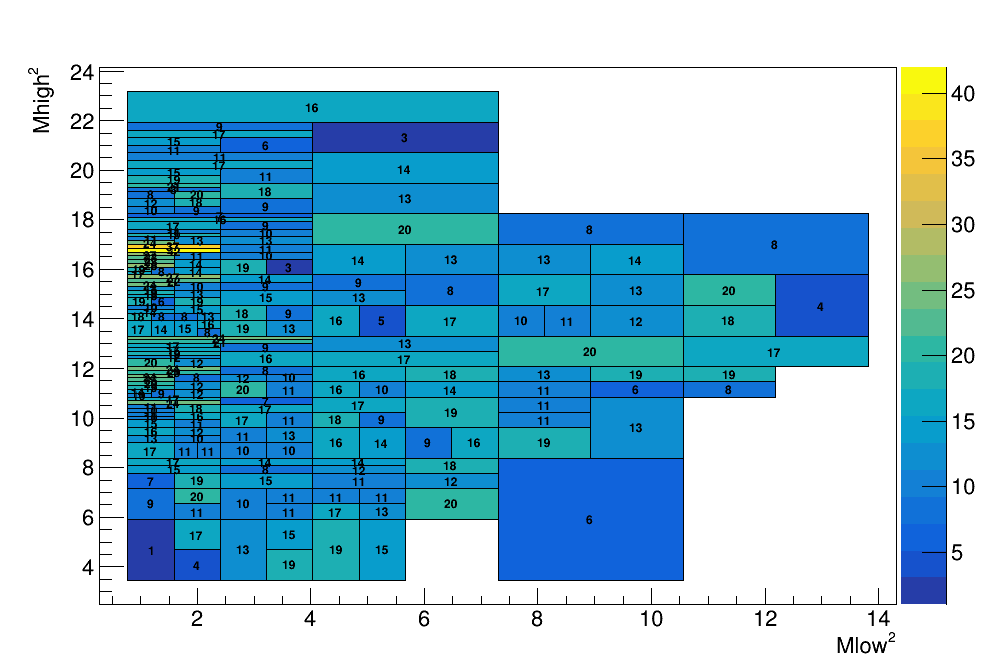

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [10]:
double border = .2;
double min_x = *min_element(x.begin(), x.end()) - border, max_x = *max_element(x.begin(), x.end()) + border;  
double min_y = *min_element(y.begin(), y.end()) - border, max_y = *max_element(y.begin(), y.end()) + border;

setBin(0, true, min_x, max_x, min_y, max_y);  // INITIAL BIN

int iterations   = 7;
int entry_thresh = 20;
int next_bin = 1, current_bins = 1;

// MAIN ALGORITHM
for(int itr = 0; itr < iterations; ++itr) {
    
    for(int bin = 0; bin < current_bins; ++bin){
        
        int counter = 0;
        for(int i = 0; i < size(x); ++i){
            if(x[i] > vecBin[bin].xmin && x[i] < vecBin[bin].xmax && y[i] > vecBin[bin].ymin && y[i] < vecBin[bin].ymax)
                counter++;
        }
        if(counter > entry_thresh){
            double deltaX = (vecBin[bin].xmax - vecBin[bin].xmin)/2;
            setBin(next_bin, true, vecBin[bin].xmin + deltaX, vecBin[bin].xmax, vecBin[bin].ymin, vecBin[bin].ymax);
            vecBin[bin].xmax = vecBin[bin].xmin + deltaX;
            next_bin++;
        }
        else if(counter == 0) vecBin[bin].binOn = false;
    }

    current_bins = next_bin;
    
    for(int bin = 0; bin < current_bins; ++bin){
        
        int counter = 0;
        for(int i = 0; i < size(x); ++i){
            if(x[i] > vecBin[bin].xmin && x[i] < vecBin[bin].xmax && y[i] > vecBin[bin].ymin && y[i] < vecBin[bin].ymax)
                counter++;
        }
        if(counter > entry_thresh){
            double deltaY = (vecBin[bin].ymax - vecBin[bin].ymin)/2;
            setBin(next_bin, true, vecBin[bin].xmin, vecBin[bin].xmax, vecBin[bin].ymin + deltaY, vecBin[bin].ymax);
            vecBin[bin].ymax = vecBin[bin].ymin + deltaY;
            next_bin++;
        }
        else if(counter == 0) vecBin[bin].binOn = false;
    }       
}


// -------------------------------------------------------------------------- PLOT
TH2Poly *h2p = new TH2Poly("whole","; Mlow^{2}; Mhigh^{2}",10, min_x-.5,max_x+.5, 10, min_y-1,max_y+1);

for(int i = 0; i < size(vecBin); ++i){
    if(vecBin[i].binOn) h2p->AddBin(vecBin[i].xmin, vecBin[i].ymin, vecBin[i].xmax, vecBin[i].ymax);
}
for(int i = 0; i < size(x); ++i)       h2p->Fill(x[i], y[i]);

TCanvas *c1 = new TCanvas("c1","c1",1000,700);
h2p->SetStats(0);
h2p->Draw("text COLZ1");
c1->Draw();

### Just the binning

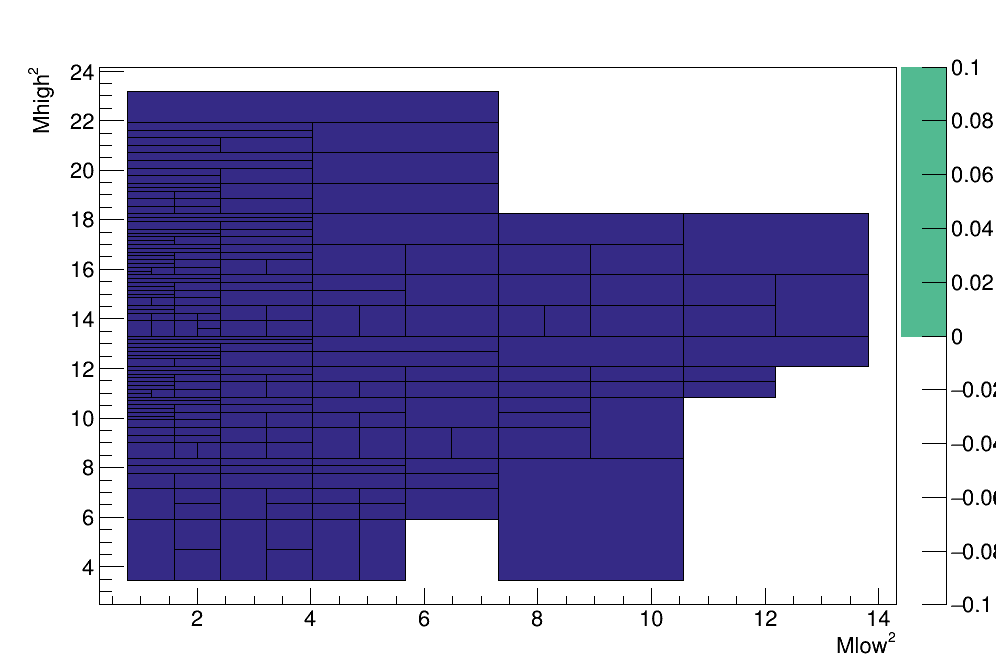

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [11]:
TH2Poly *h2p = new TH2Poly("whole","; Mlow^{2}; Mhigh^{2}",10, min_x-.5,max_x+.5, 10, min_y-1,max_y+1);

for(int i = 0; i < size(vecBin); ++i){
    if(vecBin[i].binOn) h2p->AddBin(vecBin[i].xmin, vecBin[i].ymin, vecBin[i].xmax, vecBin[i].ymax);
}

TCanvas *c1 = new TCanvas("c1","c1",1000,700);
h2p->SetStats(0);
h2p->Draw("text COLZ1");
c1->Draw();

-----------------------

# Normal plots

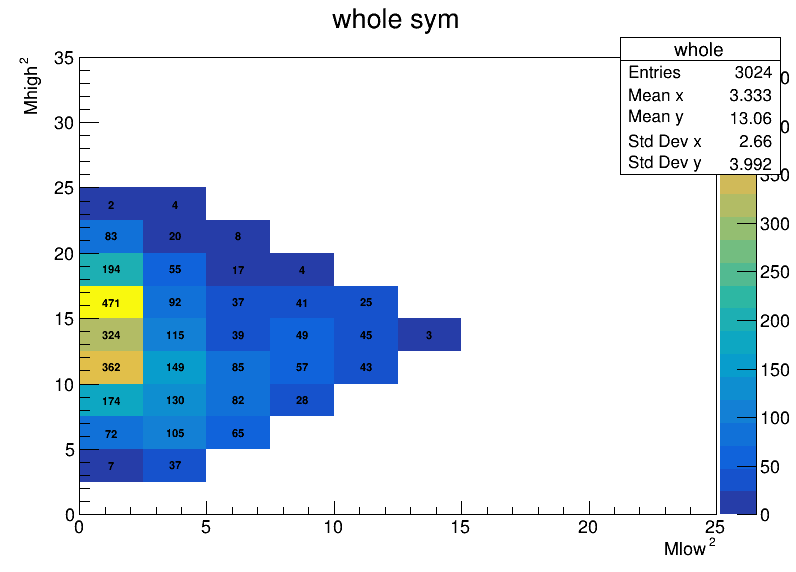

In [9]:
TCanvas *canvas = new TCanvas("Canvas","",800,600);
whole->Draw("text COLZ");
canvas->Draw()

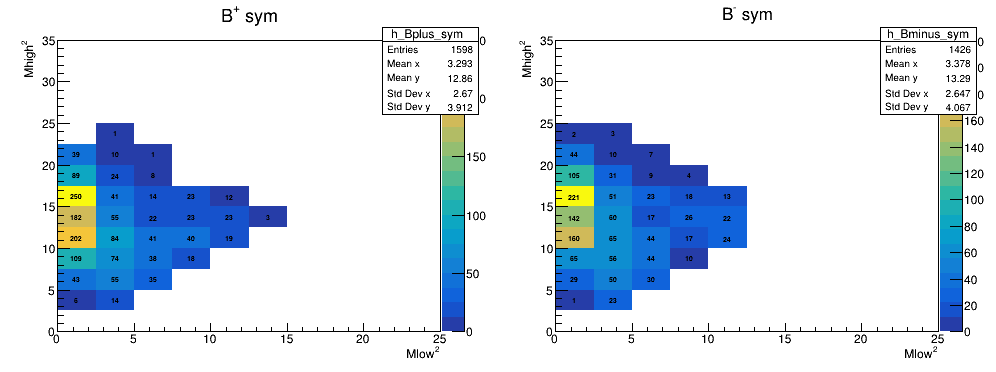

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [10]:
auto c1 = new TCanvas("c1","c1",1000,400);    c1->Divide(2,1);

c1->cd(1); h_Bplus_sym->Draw("text COLZ");
c1->cd(2); h_Bminus_sym->Draw("text COLZ");
c1->Draw()

the $Mlow^2$ variable for $Mhigh^2$ < 15 $GeV^2/c^4$ [ref](https://lhcbproject.web.cern.ch/lhcbproject/Publications/LHCbProjectPublic/LHCb-PAPER-2013-027.html)

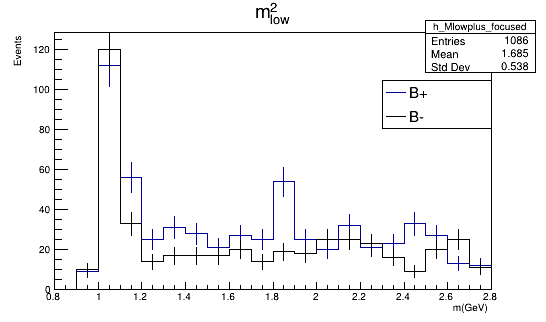

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas


In [28]:
TCanvas *canvas = new TCanvas("Canvas","",550,350);

h_Mlowplus_focused->Draw("hist e");
h_Mlowminus_focused->Draw("samehist e");
h_Mlowminus_focused->SetLineColor(1);

TLegend *leg = new TLegend(0.7,0.6,0.9,0.75);
leg->AddEntry(h_Mlowplus_focused, "B+", "l"); leg->AddEntry(h_Mlowminus_focused, "B-", "l"); leg->Draw();
canvas->Draw()

-----------------

# Asymmetry

# <div style="text-align:center"> $A = \frac{N^- - N^+}{N^- + N^+}$ </div>

# Statistical uncertainty

# <div style="text-align:center"> $\sigma_A = \sqrt{ \frac{1 - A^2}{N^- + N^+} }  $ </div>

The significance of the result, sigma, is found by dividing the value for asymmetry by its uncertainty. A value exceeding three sigma is considered "evidence" by particle physicists while a value of five sigma or more can be called an "observation" or "discovery"

#### Operating histograms

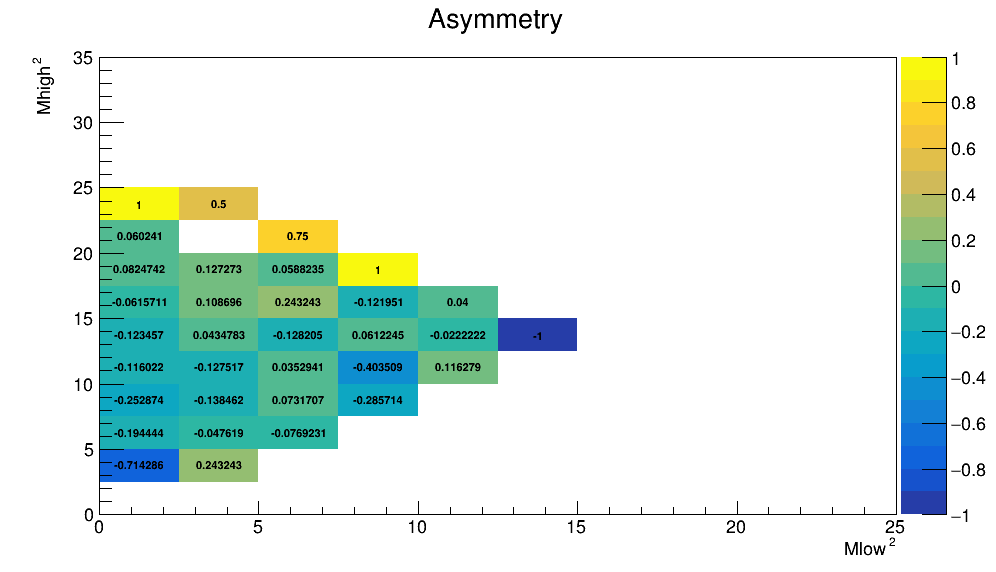

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas


In [12]:
TH2F *Numerator = (TH2F*) h_Bminus_sym->Clone();
TH2F *Denominator = (TH2F*) h_Bminus_sym->Clone();
Numerator->Add(h_Bplus_sym, -1);
Denominator->Add(h_Bplus_sym, 1);

Numerator->Divide(Denominator);

TH2F *Asym = Numerator;
Asym->SetTitle("Asymmetry");
    
TCanvas *canvas = new TCanvas("Canvas","",1000,600);
Asym->SetStats(0);
Asym->Draw("text colz1");
canvas->Draw();

#### Re-setting bin content

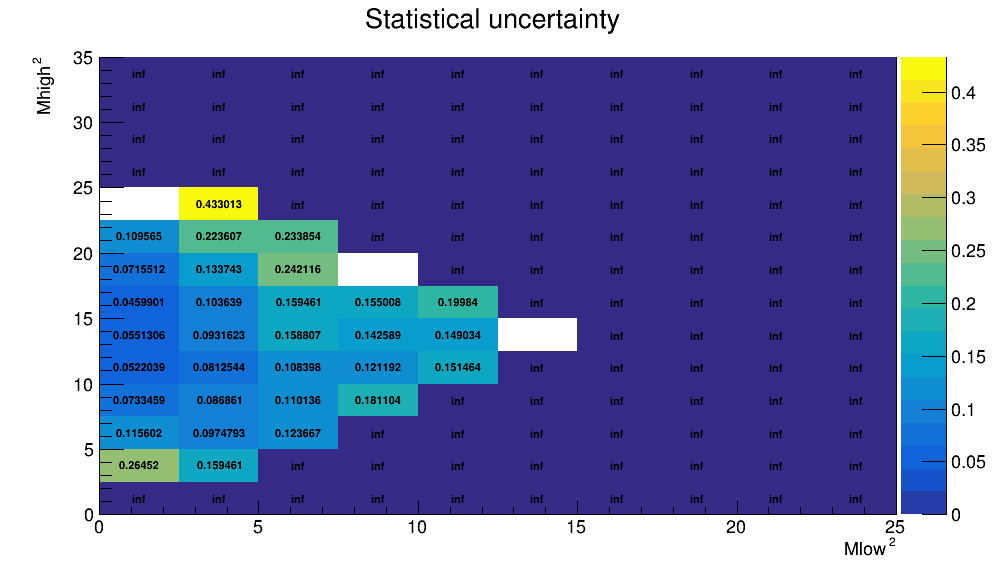

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas


In [13]:
TH2F *Uncertainty = (TH2F*) Asym->Clone();
Uncertainty->SetTitle("Statistical uncertainty");

for (int bin=0; bin<=Asym->GetNcells(); ++bin) {
    double binAsym = Uncertainty->GetBinContent(bin);
    double binDenom = Denominator->GetBinContent(bin);
    Uncertainty->SetBinContent(bin, sqrt( (1 - binAsym*binAsym) / binDenom ));
}
    
TCanvas *canvas = new TCanvas("Canvas","",1000,600);
Uncertainty->SetStats(0);
Uncertainty->Draw("text colz");
canvas->Draw();

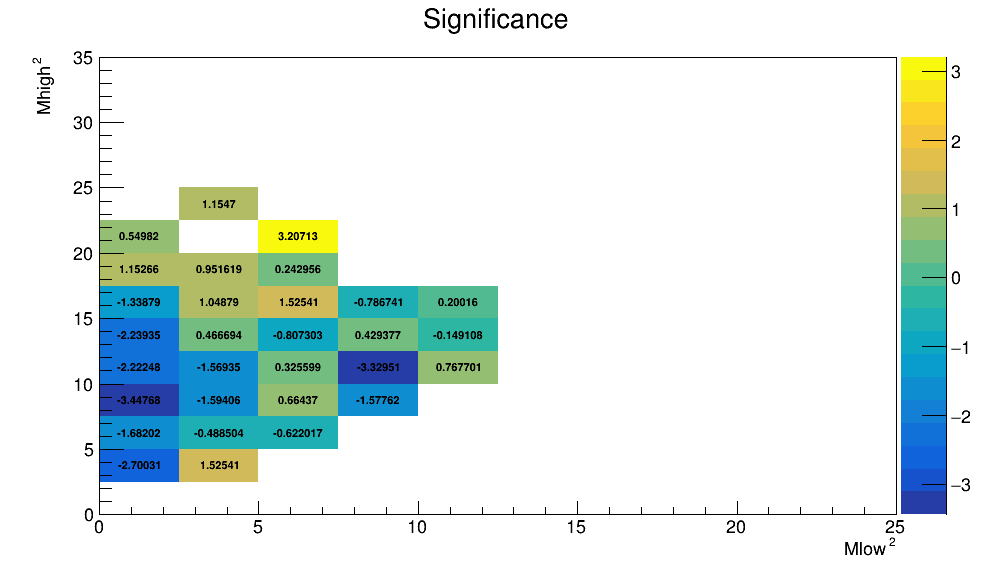

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas


In [14]:
TH2F *Significance = (TH2F*) Asym->Clone();
Significance->SetTitle("Significance");

Significance->Divide(Uncertainty);
    
TCanvas *canvas = new TCanvas("Canvas","",1000,600);
// Significance->SetStats(0);
Significance->Draw("text colz1");
canvas->Draw();

# Plots with adaptative binning

In [12]:
TH2Poly *h2p = new TH2Poly("whole","; Mlow^{2}; Mhigh^{2}",10, min_x-.5,max_x+.5, 10, min_y-1,max_y+1);

for(int i = 0; i < size(vecBin); ++i){
    if(vecBin[i].binOn) h2p->AddBin(vecBin[i].xmin, vecBin[i].ymin, vecBin[i].xmax, vecBin[i].ymax);
}

double min_prob_ka = 0.8;  double max_prob_pi = 0.2;

TH2Poly *h_Bplus_sym2  = (TH2Poly*) h2p->Clone();
TH2Poly *h_Bminus_sym2 = (TH2Poly*) h2p->Clone();

In [13]:
void fun2(double X, double Y){
    if(H1_Charge == -1) {
        h_Bplus_sym2->Fill(Y*Y/1e6,X*X/1e6);                                     
    }
    if(H1_Charge == 1) {
        h_Bminus_sym2->Fill(Y*Y/1e6,X*X/1e6);              
    }      
}

In [14]:
for (i = 0; i < nentries; i++)
{
    nbytes = B2HHH->GetEntry(i); 
    
    if(H1_isMuon == 1 || H2_isMuon == 1 || H3_isMuon == 1) continue;
    if(H1_ProbK < min_prob_ka || H2_ProbK < min_prob_ka || H3_ProbK < min_prob_ka) continue;
    if(H1_ProbPi  > max_prob_pi || H2_ProbPi  > max_prob_pi || H3_ProbPi  > max_prob_pi) continue;
    
    // DEFINING AND FEEDING TLORENTZ VECTORS
    TLorentzVector Kaon1  = TLorentzVector();   Kaon1.SetXYZM(H1_PX, H1_PY, H1_PZ,K_m);  
    TLorentzVector Kaon2  = TLorentzVector();   Kaon2.SetXYZM(H2_PX, H2_PY, H2_PZ,K_m);  
    TLorentzVector Kaon3  = TLorentzVector();   Kaon3.SetXYZM(H3_PX, H3_PY, H3_PZ,K_m);   
    
    // WORKING OUT THE RANDOMIZATION
    TRandom2 *rand = new TRandom2(i);          int r = rand->Binomial(1,0.5);
    TLorentzVector *vec_array = new TLorentzVector[2];
    vec_array[0] = Kaon2;      vec_array[1] = Kaon3;
    
    // 2-BODY INVARIANT MASSES (NOTE RANDOMNESS)
    double M12 = (Kaon1 + vec_array[r]).M();     double M13 = (Kaon1 + vec_array[1-r]).M();
    
    double PT = (Kaon1 + Kaon2 + Kaon3).Pt();
    double Bmass = (Kaon1 + Kaon2 + Kaon3).M();
    
    if(Bmass < B_m + 50 && Bmass > B_m - 50 && PT > 1700) { // B Pt and Mass cuts    
        
        if( (M12 < D0m - 30. || M12 > D0m + 30.) && (M13 < D0m - 30. || M13 > D0m + 30.) ){ // D0 exclusion            
            
            if(M12 > M13) fun2(M12,M13);
            else          fun2(M13,M12); 

        }
    }
}

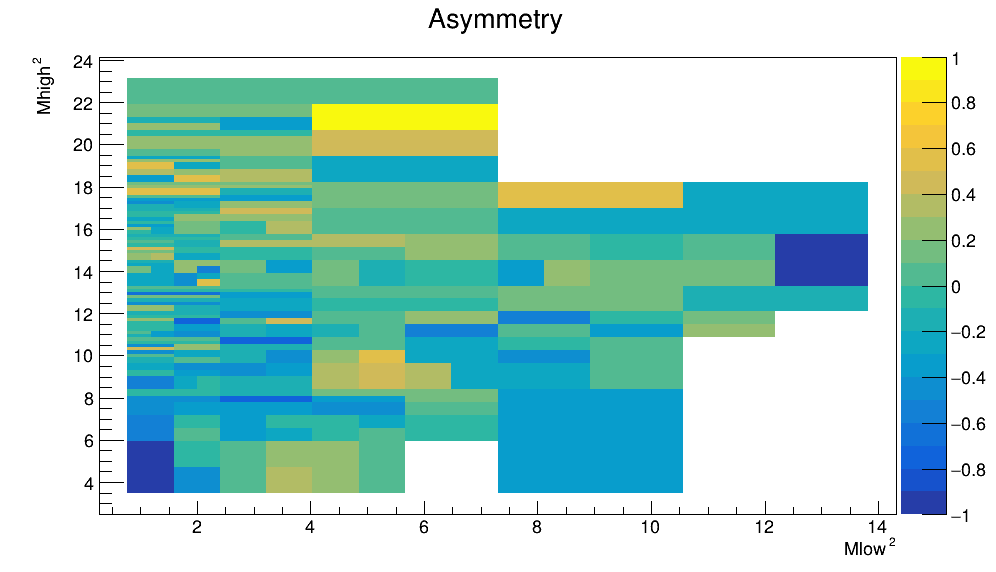

In [15]:
TH2F *Numerator = (TH2F*) h_Bminus_sym2->Clone();
TH2F *Denominator = (TH2F*) h_Bminus_sym2->Clone();
Numerator->Add(h_Bplus_sym2, -1);
Denominator->Add(h_Bplus_sym2, 1);

Numerator->Divide(Denominator);

TH2F *Asym = Numerator;
Asym->SetTitle("Asymmetry");
    
TCanvas *canvas = new TCanvas("Canvas","",1000,600);
Asym->SetStats(0);
Asym->Draw(" colz1");
canvas->Draw();

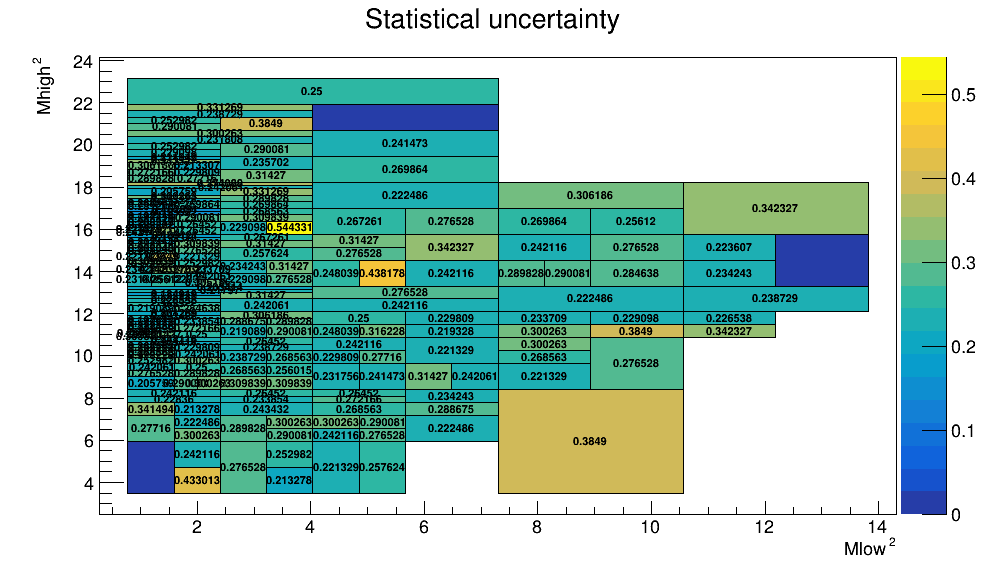

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas


In [17]:
TH2F *Uncertainty = (TH2F*) Asym->Clone();
Uncertainty->SetTitle("Statistical uncertainty");

for (int bin=0; bin<=Asym->GetNcells(); ++bin) {
    double binAsym = Uncertainty->GetBinContent(bin);
    double binDenom = Denominator->GetBinContent(bin);
    Uncertainty->SetBinContent(bin, sqrt( (1 - binAsym*binAsym) / binDenom ));
}
    
TCanvas *canvas = new TCanvas("Canvas","",1000,600);
Uncertainty->SetStats(0);
Uncertainty->Draw("text colz");
canvas->Draw();

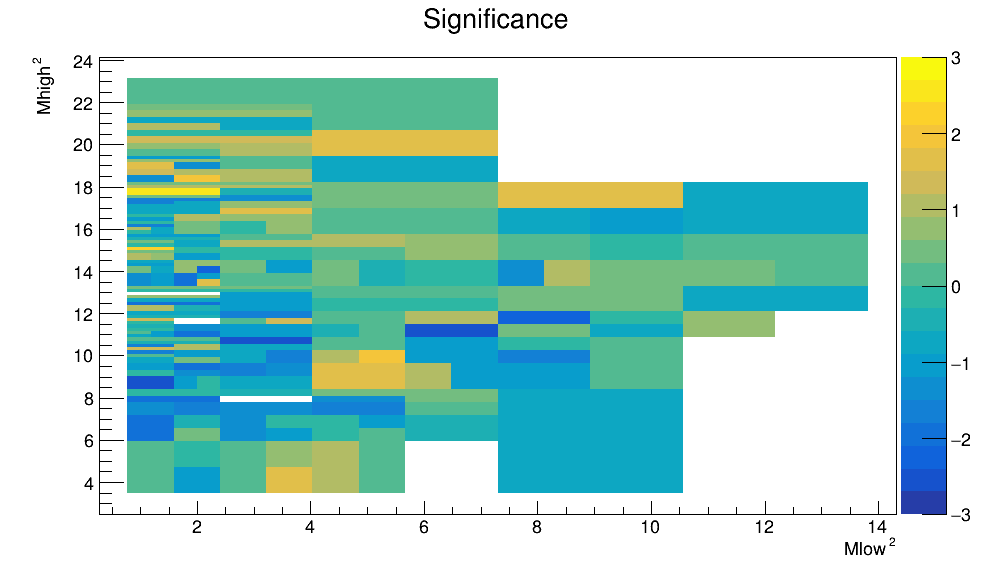

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas


In [21]:
TH2F *Significance = (TH2F*) Asym->Clone();
Significance->SetTitle("Significance");

Significance->Divide(Uncertainty);
    
TCanvas *canvas = new TCanvas("Canvas","",1000,600);
// Significance->SetStats(0);
Significance->Draw("colz1");
Significance->GetZaxis()->SetRangeUser(-3, 3);
canvas->Draw();